### Datasource # 1 - https://www.kaggle.com/lislejoem/us-minimum-wage-by-state-from-1968-to-2017#Minimum%20Wage%20Data.csv
### Datasource # 2 - https://www.dol.gov/agencies/whd/state/minimum-wage/history

### Washington minimum wage - https://lni.wa.gov/workers-rights/wages/minimum-wage/history-of-washington-states-minimum-wage


In [9]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sea

In [10]:
dfwages = pd.read_csv('Minimum Wage Data.csv', encoding='ISO-8859-1')
dfwages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2860 entries, 0 to 2859
Data columns (total 9 columns):
Year           2860 non-null int64
State          2860 non-null object
Table_Data     2739 non-null object
Footnote       418 non-null object
High.Value     2849 non-null float64
Low.Value      2849 non-null float64
CPI.Average    2860 non-null float64
High.2018      2739 non-null float64
Low.2018       2739 non-null float64
dtypes: float64(5), int64(1), object(3)
memory usage: 201.2+ KB


In [11]:
dfwages.head()

,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1968,Alaska,2.1,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


In [12]:
dfwages['High.Value'] = dfwages['High.Value'].round(2)
dfwages['Low.Value'] = dfwages['Low.Value'].round(2)
dfwages['CPI.Average'] = dfwages['CPI.Average'].round(2)
dfwages.head()

,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,1968,Alabama,...,NaN,0.00,0.00,34.78,0.00,0.00
1,1968,Alaska,2.1,NaN,2.10,2.10,34.78,15.12,15.12
2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66,0.47,34.78,4.75,3.37
3,1968,Arkansas,1.25/day(b),(b),0.16,0.16,34.78,1.12,1.12
4,1968,California,1.65(b),(b),1.65,1.65,34.78,11.88,11.88


In [13]:
Zones = {'Washington':'PST',
      'Oregon':'PST',
      'Nevada':'PST', 
      'California':'PST',
       'Montana':'MST',
       'Idaho':'MST',
        'Wyoming':'MST',
        'Utah':'MST',
        'Colorado':'MST',
        'New Mexico':'MST',
         'Arizona':'MST',
        'North Dakota':'CST',
         'South Dakota':'CST',
         'Minnesota':'CST',
         'Nebraska':'CST',
         'Iowa':'CST',
         'Kansas':'CST',
         'Missouri':'CST',
         'Oklahoma':'CST',
         'Arkansas':'CST',
         'Texas':'CST',
         'Louisiana':'CST',
         'Mississippi':'CST',
         'Alabama':'CST',
         'Illinois':'CST',
         'Wisconsin':'CST',
         'Tennessee':'CST',
         'Florida':'CST',
         'Georgia':'EST',
         'South Carolina':'EST',
         'North Carolina':'EST',
         'Virginia':'EST',
         'Kentucky':'EST',
         'Virginia':'EST',
         'West Virginia':'EST',
         'District of Columbia':'EST',
         'Indianapolis':'EST',
         'Ohio':'EST',
         'Pennsylvania':'EST',
         'Michigan':'EST',
         'Connecticut':'EST',
         'Delaware':'EST',
         'Maine':'EST',
         'Maryland':'EST',
         'Massachusetts':'EST',
         'New Hampshire':'EST',
         'New Jersey':'EST',
         'New York':'EST',
         'Rhode Island':'EST',
         'Indiana':'EST',
         'Vermont':'EST',
         'Federal (FLSA)':'Gov',
         'Alaska':'AKST',
         'Hawaii':'HAST',
         'Guam':'ChST',
         'Puerto Rico':'AST',
         'U.S. Virgin Islands':'AST'
        }
Zones
dfwages['Zone'] = dfwages['State'].map(Zones)

dfwages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2860 entries, 0 to 2859
Data columns (total 10 columns):
Year           2860 non-null int64
State          2860 non-null object
Table_Data     2739 non-null object
Footnote       418 non-null object
High.Value     2849 non-null float64
Low.Value      2849 non-null float64
CPI.Average    2860 non-null float64
High.2018      2739 non-null float64
Low.2018       2739 non-null float64
Zone           2860 non-null object
dtypes: float64(5), int64(1), object(4)
memory usage: 223.5+ KB


In [57]:
dfwages.rename(columns={'High.Value':'HighValue'},inplace=True)
dfwages.head()

,Year,State,Table_Data,Footnote,HighValue,Low.Value,CPI.Average,High.2018,Low.2018,Zone
0,1968,Alabama,...,NaN,0.00,0.00,34.78,0.00,0.00,CST
1,1968,Alaska,2.1,NaN,2.10,2.10,34.78,15.12,15.12,AKST
2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66,0.47,34.78,4.75,3.37,MST
3,1968,Arkansas,1.25/day(b),(b),0.16,0.16,34.78,1.12,1.12,CST
4,1968,California,1.65(b),(b),1.65,1.65,34.78,11.88,11.88,PST


In [15]:
dfzones = dfwages.groupby(['Year','Zone']).HighValue.mean()
dfzones = dfzones.reset_index()
dfzones.head()

,Year,Zone,HighValue
0,1968,AKST,2.100000
1,1968,AST,1.600000
2,1968,CST,0.371176
3,1968,ChST,1.250000
4,1968,EST,1.092857


In [16]:
dfEST=dfzones[(dfzones['Zone'] == 'EST')]
dfCST=dfzones[(dfzones['Zone'] == 'CST')]
dfMST=dfzones[(dfzones['Zone'] == 'MST')]
dfPST=dfzones[(dfzones['Zone'] == 'PST')]
dfFed=dfzones[(dfzones['Zone'] == 'Gov')]

### Graph showing minimum wage increase from 1968-2019 for all states in 4 major time zones vs. the Federal gov recommendations

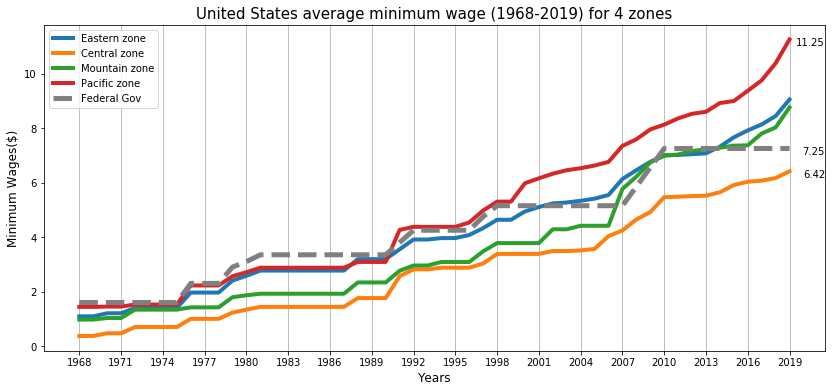

In [56]:
import matplotlib.ticker as plticker

plt.figure(figsize=(14,6))

plt.plot(dfEST['Year'], dfEST['HighValue'], linewidth=4)
plt.plot(dfCST['Year'], dfCST['HighValue'], linewidth=4)
plt.plot(dfMST['Year'], dfMST['HighValue'], linewidth=4)
plt.plot(dfPST['Year'], dfPST['HighValue'], linewidth=4)
plt.plot(dfFed['Year'], dfFed['HighValue'], linewidth=5, color='grey', linestyle='--')
plt.legend(['Eastern zone','Central zone','Mountain zone','Pacific zone', 'Federal Gov'], loc=0)

# annotate the data for Pascific zone vs Federal gov. 
for var in (dfPST['HighValue'], dfFed['HighValue'],dfCST['HighValue']):
    plt.annotate('%0.2f' % var.max(), xy=(1, var.max()), xytext=(0, 2), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',
                 horizontalalignment='right', verticalalignment='top')

ax = plt.gca()
loc = plticker.MultipleLocator(base=3.0) # sets the ticks rate
ax.xaxis.set_major_locator(loc) # sets the ticks

ax.set_xlabel('Years',fontdict={'fontsize':'12'})
ax.set_ylabel('Minimum Wages($)',fontdict={'fontsize':'12'})
ax.set_title('United States average minimum wage (1968-2019) for 4 zones', fontdict={'fontsize':'15'})
ax.grid(axis='x')  # to add grid